<h1> Mapping Using Twitter API</h1>
    <h3> Import libraries.
    <br> Collect tweets.
    <br> Remove url from tweets.
    <br> Create a list of words in tweets.
    </h3>

In [18]:
import tweepy
import re
import configparser

config = configparser.ConfigParser()
config.read('access.ini')

auth = tweepy.OAuthHandler(config['TWITTER']['API_key'], config['TWITTER']['API_key_secret'])
auth.set_access_token(config['TWITTER']['Access_Token'], config['TWITTER']['Access_Token_Secret'])


def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

api = tweepy.API(auth, wait_on_rate_limit=True)

public_tweets = api.home_timeline()

all_tweets = []
for tweet in public_tweets:
    all_tweets.append(remove_url( tweet.text))
print(all_tweets)


['RT CucubanoPod El prximo lunes sale un episodio con Beatriz Llenn Figueroa de EEEmergente La conversacin estuvo tan buena que ni cue', 'RT mattdpearce A little surreal that were in the seconddeadliest period of the entire twoyear pandemic and also very clearly in the', 'Archivists are the secret masters of the world They control information Dont ever piss one offSpider Robin', 'This is beautiful', 'Skip Gates and Harvard colleagues running back to sign that just kidding letter after the heat got hot', 'RT FrancisTroyan A pleasure to work and think with SPPOOSU doc student Lauren Miranda Check out her awesome work with the IPA OSUehe', 'RT AnshareA Seeking Technical Communication faculty for a research study on the possible role of tech comm pedagogy in addressing the iss', 'RT UCFGradStudies UCFTandT PhD candidate Christopher Odom is studying the visual imagery and digital activism of the George Floyd socia', 'RT evangelestia When your librarians tell you that they have been traumati

<h2> Use Pandas to sort and analyze tweets.</h2>
    <h3> Set up search word and date.
    <br> Collect and sort tweets.
    <br> Choose columns for DataFrame.
    <br> Save the content of the DataFrame to a local file to only poll once from Twitter.
</h3>

In [67]:
import pandas as pd

search_words = ("لقاحات OR تطعيم OR لقاح OR تطعيمات")
date_since = "2021-10-01"
tweets = tweepy.Cursor(api.search_tweets,
              q=search_words, lang="ar").items(1000)

tweets_sorted = [[tweet.user.screen_name, tweet.geo, tweet.user.location, tweet.text] for tweet in tweets]
print(tweets_sorted)
tdf = pd.DataFrame(data=tweets_sorted, columns=['user', 'coordinates','location', 'tweet'])
print(tdf.tweet)

tdf.to_csv('tweet_data.csv')


[['mewmew26281816', None, '', 'RT @tooty38_cute: @Vv25457017 @mewmew26281816 @SaudiNews50 اختصرها عليك السفيه هو الذي لايستخدم عقله يقلد يتبع سمه ماشئت من غير تفكير  ولاي…'], ['fayezoffice1', None, 'المملكة العربية السعودية', '@AlShababSaudiFC @KSASociety شغال الآن\nفحص سفر معتمد ✓\nارسل وازهل \nماتدفع ولا ريال لبعد متاخذ فحصك\nشغالين الان لقاح… https://t.co/Dr7NBnbs9o'], ['amola1428', None, 'مكة المكرمة, المملكة العربية ا', 'RT @goodhuman55: @Eyaaaad انت وعسيري تمارسون مغالطة رجل القش ، وتحاولون تختارون اضعف حجة وتردون عليها\n\nعالعموم .. انا من يوم قريت عن تقنية…'], ['tooty38_cute', None, '', '@Vv25457017 @mewmew26281816 @SaudiNews50 اختصرها عليك السفيه هو الذي لايستخدم عقله يقلد يتبع سمه ماشئت من غير تفكير… https://t.co/lazideyPZL'], ['AlMarriShaikha_', None, 'Al Rayyan, Qatar', 'RT @NedaaAlkhamis: ️ بي بي سي BBC تعترف أنهم يستخدمون فيروس نقص المناعة البشرية لصنع لقاح كوفيد !!! ️ https://t.co/2jYon42lna'], ['fayezoffice1', None, 'المملكة العربية السعودية', '@Akhbaar24 شغال الآن\nفحص

<h3> Read tweets from file.
<br> Display locations mentioned more than 3 times in tweets. 
</h3>

In [68]:
tdf = pd.read_csv('tweet_data.csv', index_col=0)

locs = tdf['location'].value_counts()
locs=locs[locs>=3]
print(tdf.location)

0                                 NaN
1            المملكة العربية السعودية
2      مكة المكرمة, المملكة العربية ا
3                                 NaN
4                    Al Rayyan, Qatar
                    ...              
248                           Algérie
249                               NaN
250                            Kuwait
251                               NaN
252                      Muscat, Oman
Name: location, Length: 253, dtype: object


<h2> Find Locations. </h2>
    <h3> Import geocoder libraries.
    <br> find_location is a function that returns longitude and latitude of a given location.
    <br> Leverage find_location to build a data frame that contains longitude and latitude columns.
    <br> Note: commented out code was a failed attempt to limit the data plot to the US.
    </h3>

In [69]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

#US Boundaries
us_lat_min = 30.0902
us_lat_max = 44.5260 
us_long_min = -74.7129
us_long_max = -120.2551

geolocator = Nominatim(user_agent='twitter-analysis-client')
limited = RateLimiter(geolocator.geocode, min_delay_seconds=0.05)

def find_location(row):
    place = row['location']
    location = limited(place)
    
    if location != None:
        #if(location.latitude >= us_lat_min and location.latitude <= us_lat_max or
           #location.longitude >= us_long_min and location.longitude <= us_long_max  ):
            #print( place, location.latitude, location.longitude )
        return location.latitude, location.longitude
    else:
        return "Not Found", "Not Found"

tdf[['latitude','longitude']] = tdf.apply(find_location, axis="columns", result_type="expand")
tdf

user  coordinates                        location  \
0     mewmew26281816          NaN                             NaN   
1       fayezoffice1          NaN        المملكة العربية السعودية   
2          amola1428          NaN  مكة المكرمة, المملكة العربية ا   
3       tooty38_cute          NaN                             NaN   
4    AlMarriShaikha_          NaN                Al Rayyan, Qatar   
..               ...          ...                             ...   
248  ImeneAlgeroise7          NaN                         Algérie   
249           n00ok9          NaN                             NaN   
250      law_mudahka          NaN                          Kuwait   
251       alwatan600          NaN                             NaN   
252      Mustafauali          NaN                    Muscat, Oman   

                                                 tweet   latitude  longitude  
0    RT @tooty38_cute: @Vv25457017 @mewmew26281816 ...  46.314475  11.048029  
1    @AlShababSaudiFC @KSASociety شغال الآن\nفحص سف...  25.624262  42.352833  
2    RT @goodhuman55: @Eyaaaad انت وعسيري تمارسون م...  Not Found  Not Found  
3    @Vv25457017 @mewmew26281816 @SaudiNews50 اختصر...  46.314475  11.048029  
4    RT @NedaaAlkhamis: ️ بي بي سي BBC تعترف أنهم ي...  24.930474  50.977689  
..                                                 ...        ...        ...  
248  @El_Bilade صفوا قلوبكم وكفاكم عبثا بالشعب ساعا...  28.000027   2.999983  
249  هاذي من المدافعين عن اللقاح\nتدعم الحريات بكل ...  46.314475  11.048029  
250  RT @kawakibi1: كذلك يحب الغاء قانون ٢٠١٥ الملز...  29.273396  47.497948  
251  @emad1823 ملف الزومبي لقاح كورونا\nالرد على عس...  46.314475  11.048029  
252  RT @AJELNEWS24: وكيل وزارة الصحة د. عبدالله عس...  23.590763  58.446005  

[253 rows x 6 columns]

<h3> Plot the geographic location of tweets containing the searched word. </h3>

In [70]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (20, 10)

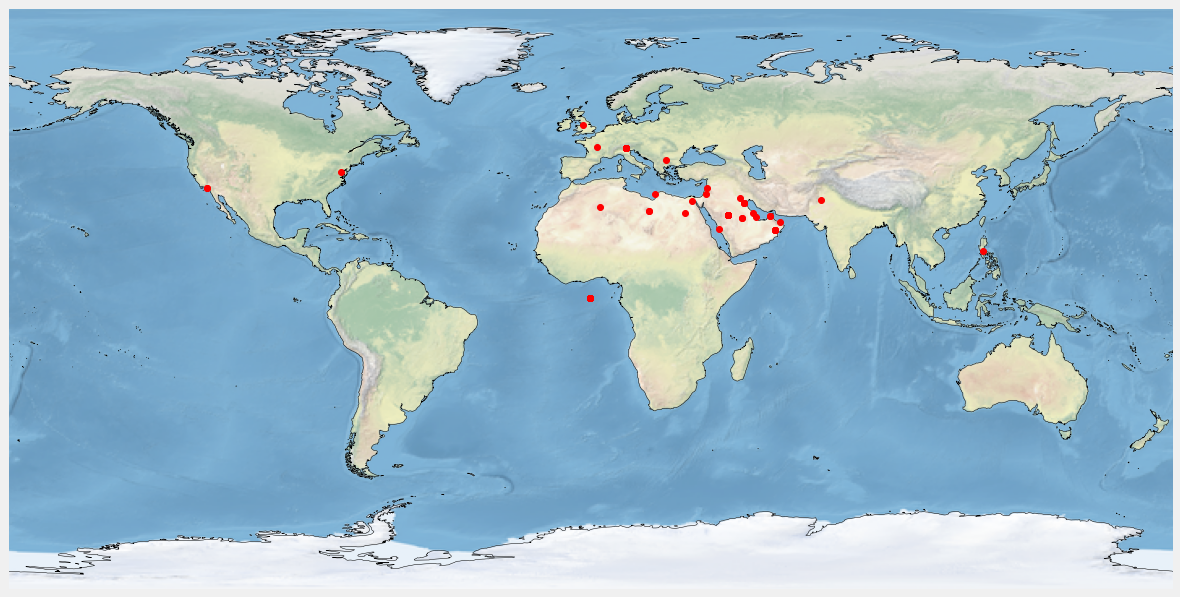

In [71]:
import cartopy.crs as ccrs
from matplotlib.patches import Circle



lats = tdf['latitude'].dropna()
longs = tdf['longitude'].dropna()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
    
for i in range(0, len(lats)):
    ax.plot(longs[i], lats[i], 'ro', transform=ccrs.PlateCarree())
                                                                                              
ax.coastlines(resolution='50m')
ax.set_global()

plt.show()

In [72]:
counter = tdf.groupby(['latitude','longitude']).size().reset_index().rename(columns={0:'count'})

print(counter)

     latitude   longitude  count
0   14.534632  121.095723      1
1   21.000029    57.00369      5
2   21.420847   39.826869      1
3   23.590763   58.446005      1
4   24.638916    46.71601      2
5   24.930474   50.977689      1
6   25.265347   55.292491      1
7   25.361499   55.392356      1
8   25.624262   42.352833     33
9   26.254049   29.267547      1
10  26.296653   50.120215      1
11  26.823447   18.123672      2
12  28.000027    2.999983      1
13  29.273396   47.497948      3
14  29.987075   31.211806      1
15   30.33084   71.247499      1
16  31.062529   46.284129      1
17  32.109915   35.736693      1
18  32.128833    20.08172      1
19  33.875063   35.843409      1
20  34.053691 -118.242766      2
21  38.895037  -77.036543      1
22  42.678808   23.321626      1
23  46.314475   11.048029     65
24  46.603354    1.888334      1
25  53.512041   -2.243461      1
26  Not Found   Not Found    122


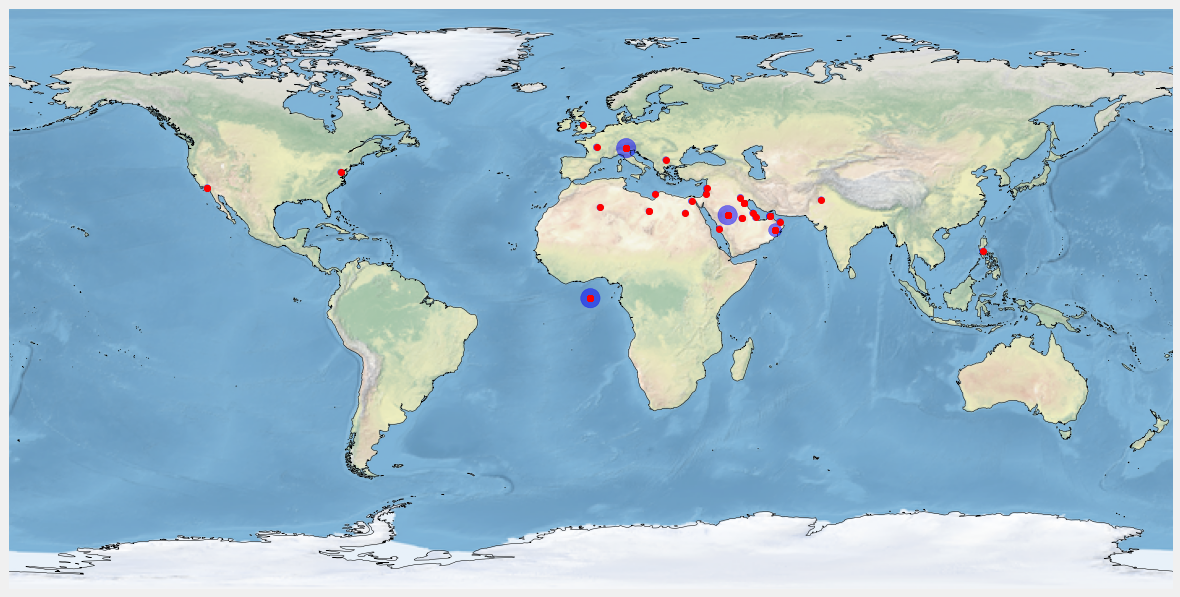

In [73]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
# plot individual locations                                                                                                       
for i in range(0, len(lats)):
    ax.plot(longs[i], lats[i], 'ro', transform=ccrs.PlateCarree())
                           
# add coastlines for reference                                                                                                
ax.coastlines(resolution='50m')
ax.set_global()
def get_radius(freq):
    if freq < 5:
        return 1
    elif freq < 10:
        return 2
    elif freq >= 10:
        return 3
# plot count of tweets per location

colLats = counter['latitude']
colLongs = counter['longitude']
colCounts = counter['count']

for i in range(0, len(counter)):
    ax.add_patch(Circle(xy=[colLongs[i], colLats[i]], radius=get_radius(colCounts[i]), color='blue',alpha=0.5, transform=ccrs.PlateCarree()))

plt.show()

<h3> Construct a wordcloud of the tweets. </h3>

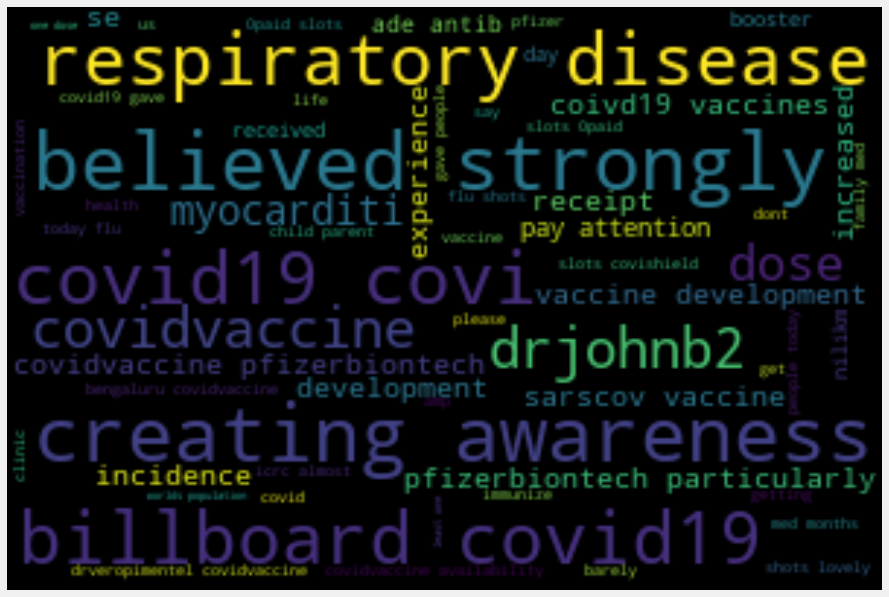

In [57]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = nltk.corpus.stopwords.words('english') 
stopwords.extend(['dad','rt','julienimoy','my', '2', 'would', 'loved'] )

tweet_words = []

for tweet in tdf.tweet:
   tweet_words += re.findall(r'\w+', tweet.lower())

vocabulary = dict( Counter( tweet_words ) )
#print(vocabulary)

text = ' '.join(map(str, tweet_words))

wordcloud = WordCloud(width=300, height=200, stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


<h3> Create a new dictionary that filters out stopwords.
<br> Plot the frequency of the tweet words.
</h3>

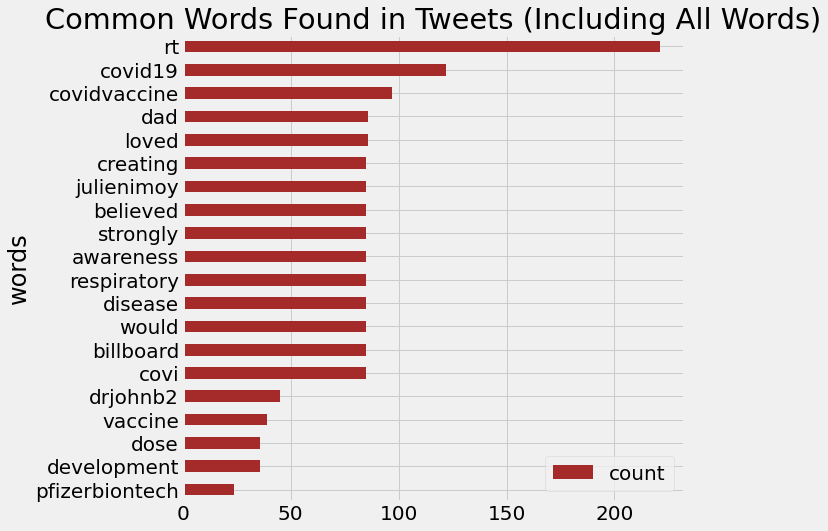

In [71]:

from nltk.corpus import stopwords
from collections import Counter

fig, ax = plt.subplots(figsize=(8, 8))
new_vocab_dict=dict()
for key in vocabulary:
    if key not in stopwords.words('english'):
        new_vocab_dict[ key ] = vocabulary[key] 

new_vocab = Counter( new_vocab_dict )

clean_tweets = pd.DataFrame(new_vocab.most_common(20), columns=['words', 'count'])
clean_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="brown")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()
